In [1]:
#Multisclice Experiments
import os
import numpy as np
import matplotlib.pyplot as plt
from ase.io import read
from abtem import *
from ase.build import surface
from skimage import data

In [2]:
cif = r'/media/andystewart/Samsung_T5/2023/2023_PtychographyExperiments/ImagingMicroscopy/sto.cif'
atoms = read(cif)
atoms = surface(atoms, indices=(0, 0, 1), layers=1, periodic=True)
atoms *= (5, 5, 1)
probe = Probe(energy=200e3, semiangle_cutoff=15, defocus=50, device='gpu')

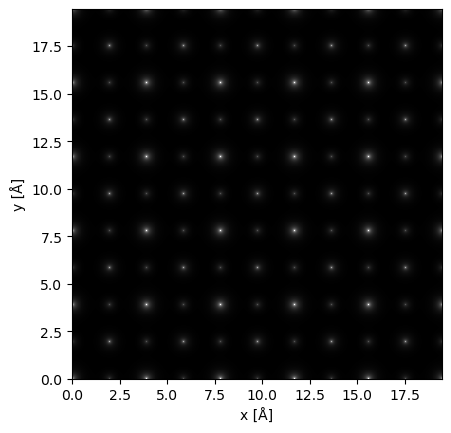

In [3]:
potential = Potential(atoms, projection='infinite', parametrization='kirkland', sampling=.05,device='gpu')

potential.project().show()

probe.grid.match(potential)

In [4]:
#define the gpts
dscanpoints = 0.171 #units are A. Variable describing the desired distance between scan points
atoms_dim = atoms.cell
supercell_percent = 0.4
gpts = [supercell_percent*atoms_dim[0][0]/dscanpoints, supercell_percent*atoms_dim[1][1]/dscanpoints] #for crystal
gridscan = GridScan(start=[0, 0],end=(supercell_percent*atoms.cell[0][0], supercell_percent*atoms.cell[1][1]), gpts=gpts)



In [5]:
print(gpts, probe.ctf.nyquist_sampling * .9)
print(gridscan.gpts)

[45.60233918128655, 45.60233918128655] 0.37619010475992704
(45, 45)


In [6]:
print(atoms.cell)

Cell([19.495, 19.495, 3.899])


In [7]:
from abtem.detect import PixelatedDetector

pixelated_detector = PixelatedDetector(max_angle=30)

In [8]:
pixelated_measurement = probe.scan(gridscan, pixelated_detector, potential)

Potential:   0%|          | 0/8 [00:00<?, ?it/s]

Scan:   0%|          | 0/2025 [00:00<?, ?it/s]

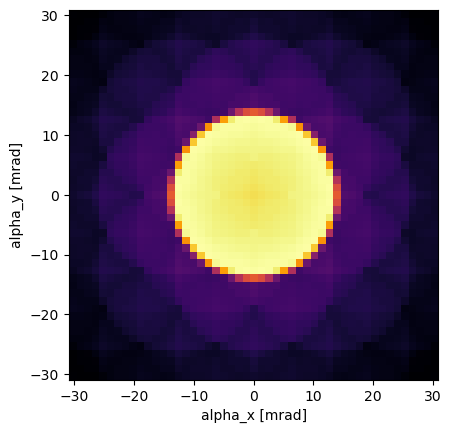

In [9]:
pixelated_measurement[0,0].show(cmap='inferno', power=.2);
#%matplotlib notebook

In [10]:
pixelated_measurement.shape

(45, 45, 49, 49)

In [11]:
# Get the parent folder of the CIF file
parent_folder = os.path.dirname(cif)

# Define the subdirectory name
subdirectory_name = 'infinite_dose'

# Create the subdirectory within the parent folder
subdirectory_path = os.path.join(parent_folder, subdirectory_name)

os.makedirs(subdirectory_path, exist_ok=True)

opath = subdirectory_path + r'/4DSTEM_infinite.hdf5'
pixelated_measurement.write(path =opath, mode='w')

'/media/andystewart/Samsung_T5/2023/2023_PtychographyExperiments/ImagingMicroscopy/infinite_dose/4DSTEM_infinite.hdf5'